In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.api import OLS

In [45]:
combined = pd.read_csv("./data/combined.csv",
                        parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
2014-01-01 00:00:00+00:00,36012,0.0,32425,8086.0,4.981596,0.0,0.0,0.0364,-1.146,0.0,0.0,0.0056,0.2378,0.9562,1.2539
2014-01-01 01:00:00+00:00,36012,0.0,32425,8803.0,4.932105,0.0,0.0,0.0449,-1.104,0.0,0.0,0.0074,0.2428,0.9672,1.2535
2014-01-01 02:00:00+00:00,36012,0.0,32425,8970.0,4.865019,0.0,0.0,0.0513,-1.059,0.0,0.0,0.0129,0.2521,0.9733,1.2530
2014-01-01 03:00:00+00:00,36012,0.0,32425,8510.0,4.842338,0.0,0.0,0.0544,-0.926,0.0,0.0,0.0140,0.2642,0.9651,1.2523
2014-01-01 04:00:00+00:00,36012,0.0,32425,8360.0,4.772505,0.0,0.0,0.0512,-0.746,0.0,0.0,0.0144,0.2764,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634,0.0,49021,15303.0,4.212916,0.0,0.0,0.0098,-1.970,0.0,0.0,0.0017,0.0931,0.5102,1.2751
2016-12-31 20:00:00+00:00,40634,0.0,49021,15354.0,4.287475,0.0,0.0,0.0099,-2.130,0.0,0.0,0.0020,0.0944,0.5235,1.2756
2016-12-31 21:00:00+00:00,40634,0.0,49021,14848.0,4.296530,0.0,0.0,0.0093,-2.293,0.0,0.0,0.0020,0.0959,0.5248,1.2759
2016-12-31 22:00:00+00:00,40634,0.0,49021,15056.0,4.419977,0.0,0.0,0.0093,-2.443,0.0,0.0,0.0021,0.0973,0.5319,1.2760


# Prediction of solar power generation based on weather data

In [46]:
solar = combined[['solar_generation_actual', 'solar_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
X_solar = solar[['solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
y_solar = solar['solar_generation_actual']
solar

,solar_generation_actual,solar_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density
2014-01-01 00:00:00+00:00,0.0,36012,4.981596,0.0,0.0,0.0,0.0,0.0364,0.0056,0.9562,1.2539
2014-01-01 01:00:00+00:00,0.0,36012,4.932105,0.0,0.0,0.0,0.0,0.0449,0.0074,0.9672,1.2535
2014-01-01 02:00:00+00:00,0.0,36012,4.865019,0.0,0.0,0.0,0.0,0.0513,0.0129,0.9733,1.2530
2014-01-01 03:00:00+00:00,0.0,36012,4.842338,0.0,0.0,0.0,0.0,0.0544,0.0140,0.9651,1.2523
2014-01-01 04:00:00+00:00,0.0,36012,4.772505,0.0,0.0,0.0,0.0,0.0512,0.0144,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,0.0,40634,4.212916,0.0,0.0,0.0,0.0,0.0098,0.0017,0.5102,1.2751
2016-12-31 20:00:00+00:00,0.0,40634,4.287475,0.0,0.0,0.0,0.0,0.0099,0.0020,0.5235,1.2756
2016-12-31 21:00:00+00:00,0.0,40634,4.296530,0.0,0.0,0.0,0.0,0.0093,0.0020,0.5248,1.2759
2016-12-31 22:00:00+00:00,0.0,40634,4.419977,0.0,0.0,0.0,0.0,0.0093,0.0021,0.5319,1.2760


# Split the dataset into training and test datasets

In [47]:
# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master = X_solar.loc[(X_solar.index >= "2014-01-01 00:00:00") & (X_solar.index <= "2015-12-31 23:00:00")]
y_train = y_solar.loc[(X_solar.index >= "2014-01-01 00:00:00") & (X_solar.index <= "2015-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master = X_solar.loc[(X_solar.index >= "2016-01-01 00:00:00") & (X_solar.index <= "2016-12-31 23:00:00")]
y_test = y_solar.loc[(X_solar.index >= "2016-01-01 00:00:00") & (X_solar.index <= "2016-12-31 23:00:00")]

# 1. Predicting solar power generation using the LinearRegression model

## 1.1 Training and validation of the LinearRegression model for all features (n=10)

### Cross-validation
In order to evaluate the performance of the algorithm, we divide the data using a procedure called cross-validation (cv for short). For the k-fold cv, the dataset is split into k smaller sets or ‘folds’, the model is trained in k-1 of those folds, and the resulting model is validated on the remaining part of the data. The performance measure provided by the cv is then the average of the performance measure computed in each experiment. 
In the code below, we use cross_val_score from sklearn.model_selection, with number of folds cv=5

The performance measure that LinearRegression gives by default is the coefficient of determination R² of the prediction. It measures how well the predictions approximate the true values.

In [48]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [49]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.928
The R2 score of the LinearRegression model (test) is: 0.955


In [50]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     solar_generation_actual   R-squared (uncentered):                   0.964
Model:                                 OLS   Adj. R-squared (uncentered):              0.964
Method:                      Least Squares   F-statistic:                          4.683e+04
Date:                     Thu, 21 May 2020   Prob (F-statistic):                        0.00
Time:                             01:01:14   Log-Likelihood:                     -1.5074e+05
No. Observations:                    17503   AIC:                                  3.015e+05
Df Residuals:                        17493   BIC:                                  3.016e+05
Df Model:                               10                                                  
Covariance Type:                 nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
solar_capacity                   0.0423      0.008      5.093      0.000       0.026       0.059
windspeed_10m                   10.4012      5.948      1.749      0.080      -1.258      22.061
radiation_direct_horizontal      1.5164      0.215      7.037      0.000       1.094       1.939
radiation_diffuse_horizontal    -0.8386      0.348     -2.408      0.016      -1.521      -0.156
irradiance_surface              26.5831      0.420     63.219      0.000      25.759      27.407
irradiance_toa                  -0.7311      0.251     -2.916      0.004      -1.223      -0.240
precipitation                -1613.9242     95.620    -16.879      0.000   -1801.348   -1426.500
snowfall                      -451.1907    461.414     -0.978      0.328   -1355.609     453.228
cloud_cover                    876.9187     50.775     17.271      0.000     777.395     976.442
air_density                  -1669.4630    261.915     -6.374      0.000   -2182.842   -1156.084
==============================================================================
Omnibus:                     2831.028   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38321.286
Skew:                           0.347   Prob(JB):                         0.00
Kurtosis:                      10.215   Cond. No.                     1.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

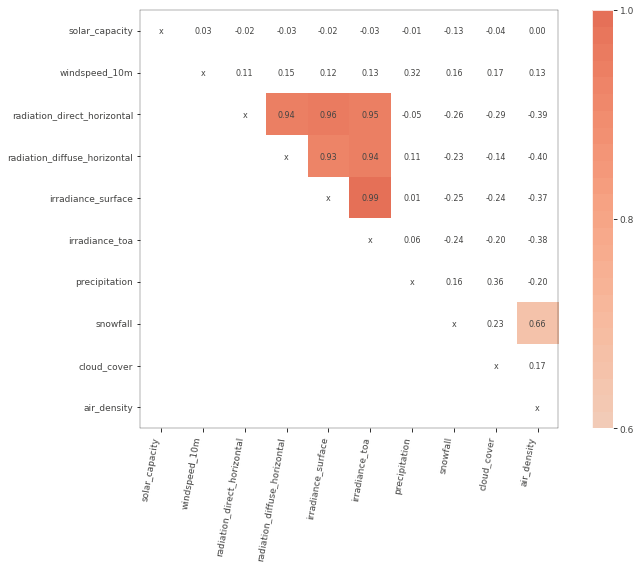

In [51]:
# Let's check for multicollinearity amongst the different features
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

- It seems that there is a strong multicollinearity between the different features for solar radiation/irradiance.
- We choose to only use `irradiance_surface` to feature solar radiation/irrandiance and to drop the other related features (see below why).
- Thus we decide to re-train and validate the models by limiting the features to: 
#### `solar_capacity`,`windspeed_10m`, `irradiance_surface`, `precipitation`, `snowfall`, `cloud_cover` and `air_density`
#### `irradiance_surface` (only)

## 1.2 Training and validation of the LinearRegression model for selected features (n=7)

In [52]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [53]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.927
The R2 score of the LinearRegression model (test) is: 0.954


#### While dropping 3 features for solar radiation/irradiance, the goodness of fit of this model is no signicantly different than for the model in 1.1 with 10 features.

In [54]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     solar_generation_actual   R-squared (uncentered):                   0.963
Model:                                 OLS   Adj. R-squared (uncentered):              0.963
Method:                      Least Squares   F-statistic:                          6.577e+04
Date:                     Thu, 21 May 2020   Prob (F-statistic):                        0.00
Time:                             01:01:27   Log-Likelihood:                     -1.5088e+05
No. Observations:                    17503   AIC:                                  3.018e+05
Df Residuals:                        17496   BIC:                                  3.018e+05
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
solar_capacity         0.0453      0.008      5.485      0.000       0.029       0.061
windspeed_10m          6.4810      5.946      1.090      0.276      -5.174      18.136
irradiance_surface    26.0801      0.051    514.031      0.000      25.981      26.180
precipitation      -1959.3321     92.372    -21.211      0.000   -2140.391   -1778.273
snowfall             290.2266    463.142      0.627      0.531    -617.577    1198.030
cloud_cover          649.4022     49.045     13.241      0.000     553.269     745.536
air_density        -1664.3491    260.130     -6.398      0.000   -2174.229   -1154.469
==============================================================================
Omnibus:                     2806.682   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35913.975
Skew:                           0.364   Prob(JB):                         0.00
Kurtosis:                       9.980   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1.3 Training and validation of the LinearRegression model for selected features (n=1)

In [77]:
selected_features = ['irradiance_surface']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [78]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.932
The R2 score of the LinearRegression model (test) is: 0.953


In [57]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     solar_generation_actual   R-squared (uncentered):                   0.962
Model:                                 OLS   Adj. R-squared (uncentered):              0.962
Method:                      Least Squares   F-statistic:                          4.464e+05
Date:                     Thu, 21 May 2020   Prob (F-statistic):                        0.00
Time:                             01:01:36   Log-Likelihood:                     -1.5114e+05
No. Observations:                    17503   AIC:                                  3.023e+05
Df Residuals:                        17502   BIC:                                  3.023e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
irradiance_surface    25.9040      0.039    668.118      0.000      25.828      25.980
==============================================================================
Omnibus:                     2795.787   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35743.409
Skew:                           0.360   Prob(JB):                         0.00
Kurtosis:                       9.964   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### By using only the feature `irradiance_surface`, the LinearRegression model could achieve a satisfying goodness of fit.

# 2. Predicting solar power generation using the DecisionTreeRegression model

## 2.1 Training and validation of the DecisionTreeRegression model for all features (n=10)

In [58]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [59]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.903
The R2 score of the LinearRegression model (test) is: 0.917


## 2.2 Training and validation of the DecisionTreeRegression model for selected features (n=7)

In [60]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [62]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.903
The R2 score of the DecisionTreeRegression model (test) is: 0.922


## 2.3 Training and validation of the DecisionTreeRegression model for selected features (n=1)

In [63]:
selected_features = ['irradiance_surface']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [64]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.877
The R2 score of the DecisionTreeRegression model (test) is: 0.901


##### The DecisionTreeRegression model seems to be less effective than the LinearRegression model

# 3. Predicting solar power generation using the RandomForestRegression model

## 3.1 Training and validation of the RandomForestRegression model for all features (n=10)

In [71]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [72]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.944
The R2 score of the RandomForestRegression model (test) is: 0.959


## 3.2 Training and validation of the RandomForestRegression model for selected features (n=7)

In [73]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [74]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.938
The R2 score of the RandomForestRegression model (test) is: 0.955


## 3.3 Training and validation of the RandomForestRegression model for selected features (n=1)

In [75]:
selected_features = ['irradiance_surface']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [76]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.907
The R2 score of the RandomForestRegression model (test) is: 0.928


##### Besides requiring much more computing resources, the RandomForestRegression model does not seem as effective as the LinearRegression model when the sole feature `irradiance_surface` is considered for the modeling. 

## 3.3 Optimization of the RandomForestRegression model for selected features

### 3.3.1 Model optimization by varying the number of decison trees in the RandomForestRegression model

In [79]:
selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [84]:
# Check the behaviour of the RandomForestRegression with the following number of decision trees
list_no_trees = [2, 5, 10, 20, 50, 100, 200]

for i in range(len(list_no_trees)):
    rf = RandomForestRegressor(n_estimators=list_no_trees[i])
    print(f"\nFor a RandomForestRegression model with {list_no_trees[i]} decision trees:")
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    print(f"The average score for the training of the model is: %0.3f" % np.mean(scores))
    rf.fit(X_train, y_train)
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(y_test, predictions_rf)
    print(f"The R2 score for the validation of the model is: %0.3f" % r2)


For a RandomForestRegression model with 2 decision trees:
The average score for the training of the model is: 0.922
The R2 score for the validation of the model is: 0.928

For a RandomForestRegression model with 5 decision trees:
The average score for the training of the model is: 0.933
The R2 score for the validation of the model is: 0.950

For a RandomForestRegression model with 10 decision trees:
The average score for the training of the model is: 0.934
The R2 score for the validation of the model is: 0.951

For a RandomForestRegression model with 20 decision trees:
The average score for the training of the model is: 0.937
The R2 score for the validation of the model is: 0.955

For a RandomForestRegression model with 50 decision trees:
The average score for the training of the model is: 0.938
The R2 score for the validation of the model is: 0.953

For a RandomForestRegression model with 100 decision trees:
The average score for the training of the model is: 0.939
The R2 score for t

##### A RandomForestRegression model with 20 decision trees seems to be a satisfying compromise for model performance and goodness to fit

### 3.3.2 Model optimization by identifying the most predictive features

In [100]:
# We intend to find out which features are most predictive of the solar power generation.

# In order to explain feature selection, we add a column of random numbers. 
# Any feature less important than a random column should be tossed out.

np.random.seed(seed = 42)
solar_2 = solar.copy()
solar_2['random'] = np.random.random(size = len(X_solar))

X_solar_2 = solar_2[['solar_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density', 'random']]
y_solar = solar_2['solar_generation_actual']


# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master_2 = X_solar_2.loc[(X_solar_2.index >= "2014-01-01 00:00:00") & (X_solar_2.index <= "2015-12-31 23:00:00")]
y_train = y_solar.loc[(X_solar_2.index >= "2014-01-01 00:00:00") & (X_solar_2.index <= "2015-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master_2 = X_solar_2.loc[(X_solar_2.index >= "2016-01-01 00:00:00") & (X_solar_2.index <= "2016-12-31 23:00:00")]
y_test = y_solar.loc[(X_solar_2.index >= "2016-01-01 00:00:00") & (X_solar_2.index <= "2016-12-31 23:00:00")]

selected_features = ['solar_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density',
                     'random']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

In [101]:
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)

rf_features_dict = {}

for score, feat in zip(map(lambda x: round(x, 3), rf.feature_importances_), X_train.columns):
    rf_features_dict[feat] = score
    
rf_features_dict_sorted = sorted(rf_features_dict.items(), key=lambda x: x[1], reverse=True)

df= pd.DataFrame(rf_features_dict_sorted, columns=['features', 'importances'])

print("Features sorted by their score for the RandomForestRegression model:")
df

Features sorted by their score for the RandomForestRegression model:


,features,importances
0,irradiance_surface,0.949
1,precipitation,0.015
2,solar_capacity,0.008
3,air_density,0.007
4,windspeed_10m,0.004
5,radiation_diffuse_horizontal,0.004
6,cloud_cover,0.004
7,radiation_direct_horizontal,0.003
8,irradiance_toa,0.002
9,random,0.002


In [104]:
from rfpimp import importances
importances(rf, X_test, y_test)

,Importance
Feature,
irradiance_surface,1.859077
precipitation,0.014420
air_density,0.009389
radiation_diffuse_horizontal,0.005300
irradiance_toa,0.002579
cloud_cover,0.002160
radiation_direct_horizontal,0.002148
windspeed_10m,0.002127
random,0.000479


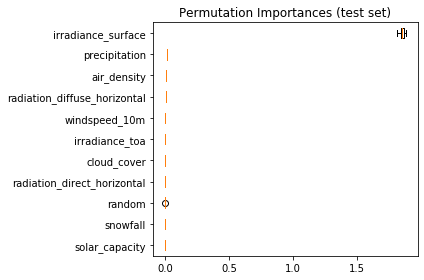

In [110]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

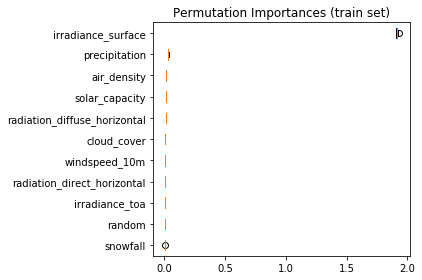

In [112]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [109]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.996
RF test accuracy: 0.956


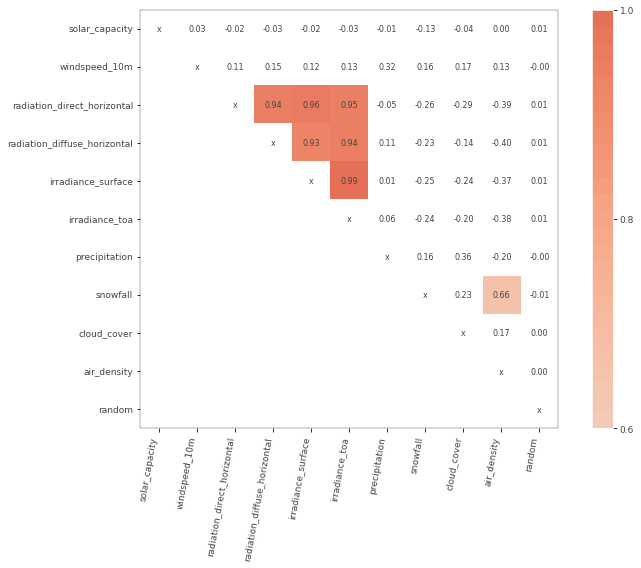

In [102]:
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

In [114]:
selected_features = ['windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

# Frist, we train the model for the prediction for solar power generation based on weather data.
rf = RandomForestRegressor(n_estimators=20)
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

The average score for the RandomForestRegression model (training) is: 0.946
The R2 score of the RandomForestRegression model (test) is: 0.961
RF train accuracy: 0.995
RF test accuracy: 0.961


In [115]:
selected_features = ['irradiance_surface']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

# Frist, we train the model for the prediction for solar power generation based on weather data.
rf = RandomForestRegressor(n_estimators=20)
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

The average score for the RandomForestRegression model (training) is: 0.907
The R2 score of the RandomForestRegression model (test) is: 0.926
RF train accuracy: 0.988
RF test accuracy: 0.926
